<a href="https://colab.research.google.com/github/Juhyuns0n/Calculator/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필독
---
**코딩 테스트 응시 방법**  
본 파일은 배포용으로, 사본을 만들어 문제 풀이를 진행해주세요.  

**평가 관련**  
문제 해결 능력을 중심으로 평가합니다.  
구현 시, 예제와 같은 구성을 따를 필요는 없습니다.  
필요없다 생각하는 부분을 덜거나, 필요하다 생각하는 부분들을 추가하셔도 됩니다. 완전히 구조가 달라도 상관 없습니다.  

 만일 구현에 실패한 부분이 있다면 무엇을 구현하고자 했지만 실패했는지, 구현 의도와 실패한 코드를 남겨주세요.  

**제출 양식**
- 제목 : [코딩 테스트/단계]이름_ 과 _학번

**구현,작업 관리 주의사항**  
아래 4가지 규칙을 지켜 구현한 코드와 보고서를 함께 제출해주신 모든 벗들과 면접을 진행할 예정입니다. 꼭 읽고 지켜주세요!

- 📍**딥러닝 프레임워크는 pytorch를 사용해주세요.**
- 📍**코드 설명을 달아주세요.**
- 📍**코드 출력을 지우지 말고 제출해주세요.**
- 📍**공유 권한을 설정해주세요.**


# MNIST DataSet에 대하여
---
MNIST dataset은 28x28 규격의 흑백 이미지 데이터 셋입니다. 이 데이터 셋은 0부터 9까지 10개의 라벨이 존재하며 이미지 학습의 대표적인 예제입니다.  
MNIST dataset은 `pytorch.vision`이나 인터넷을 통해 다운 받아 이용할 수 있습니다.

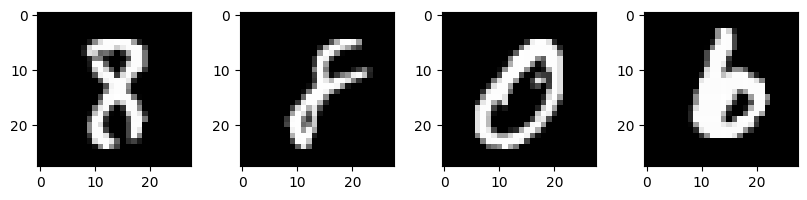

### [📕 [강화 시스터즈 1기] 01 단계 코딩 테스트 예제](https://colab.research.google.com/drive/1H7KA3WD9U2ueMfYLaQvI_sVaX09pccjN?usp=sharing)

# MNIST 데이터 셋 학습시키기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np  #tensor 이용
import pandas as pd

import torch  #tensor 이용
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets  #MNIST dataset 내장, 대부분 이미지와 라벨 반환
from torchvision.transforms import ToTensor

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",  #데이터가 저장된 path
    train=True,   #train/test 여부
    download=True,  #root에 없을때 인터넷에서 다운로드
    transform=ToTensor(), #이미지를 FloatTensor로 변환
)

# Download test data from open datasets.
test_data = datasets.MNIST(  #torchvision.datasets.FashionMNIST 인스턴스 반환
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 9912422/9912422 [00:00<00:00, 91528071.60it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30651744.39it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 22415329.90it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14744991.31it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
]

In [4]:
training_data[0][0].shape # 데이터 셋의 데이터 dim : (Channel, Height, Width)

torch.Size([1, 28, 28])

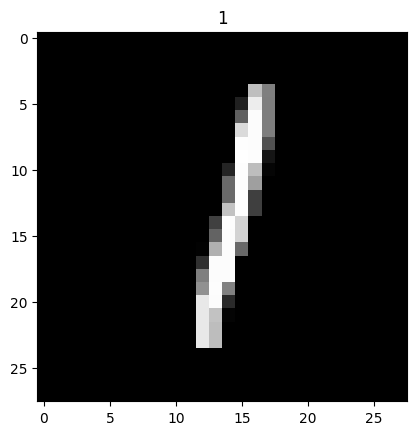

In [8]:
# 랜덤으로 인덱스를 뽑는다.
idx = random.randint(0,len(training_data))

img, label = training_data[idx] #데이터셋 인덱싱하여 img, label에 할당

img = img.permute(1,2,0) # 이미지의 데이터 dim : (Height, Width, Channel)
                        #permute()으로 텐서 차원 재배열, 단일 채널(색상x)
plt.imshow(img, cmap='gray')
plt.title(classes[int(label)])
plt.show()

In [9]:
batch_size = 64 #클수록 훈련 안정성,효율성 증가, 너무 크면 그래디언트 불안정 가능성

# Create data loaders.
trainloader = DataLoader(training_data, batch_size=batch_size)
testloader = DataLoader(test_data, batch_size=batch_size)

for X, y in testloader:#이미지 배치 X, 레이블 배치 y
    print(f"Shape of X [N, C, H, W]: {X.shape}") # [64,1,28,28]
    print(f"Shape of y: {y.shape} {y.dtype}") #1차원 텐서 길이가 64(요소가 64개),각 요소는 64비트 정수형
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
